In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("minor_training_data_large.csv")
test_data = pd.read_csv('minor_testing_data_large.csv')

In [3]:
df = train_data.copy()
df_test = test_data.copy()

In [4]:
df.isnull().sum()

bottom_lip_x       775
bottom_lip_y       775
chin_x             775
chin_y             775
left_eye_x         775
left_eye_y         775
left_eyebrow_x     775
left_eyebrow_y     775
nose_bridge_x      775
nose_bridge_y      775
nose_tip_x         775
nose_tip_y         775
right_eye_x        775
right_eye_y        775
right_eyebrow_x    775
right_eyebrow_y    775
top_lip_x          775
top_lip_y          775
Output               0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [33]:
df.bottom_lip_x.fillna(df.bottom_lip_x.mean(), inplace=True)
df.bottom_lip_y.fillna(df.bottom_lip_y.mean(), inplace=True)
df.chin_x.fillna(df.chin_x.mean(), inplace=True)
df.chin_y.fillna(df.chin_y.mean(), inplace=True)
df.left_eye_x.fillna(df.left_eye_x.mean(), inplace=True)
df.left_eye_y.fillna(df.left_eye_y.mean(), inplace=True)
df.left_eyebrow_x.fillna(df.left_eyebrow_x.mean(), inplace=True)
df.left_eyebrow_y.fillna(df.left_eyebrow_y.mean(), inplace=True)
df.nose_bridge_x.fillna(df.nose_bridge_x.mean(), inplace=True)
df.nose_bridge_y.fillna(df.nose_bridge_y.mean(), inplace=True)
df.nose_tip_x.fillna(df.nose_tip_x.mean(), inplace=True)
df.nose_tip_y.fillna(df.nose_tip_y.mean(), inplace=True)
df.right_eye_x.fillna(df.right_eye_x.mean(), inplace=True)
df.right_eye_y.fillna(df.right_eye_y.mean(), inplace=True)
df.right_eyebrow_x.fillna(df.right_eyebrow_x.mean(), inplace=True)
df.right_eyebrow_y.fillna(df.right_eyebrow_y.mean(), inplace=True)
df.top_lip_x.fillna(df.top_lip_x.mean(), inplace=True)
df.top_lip_y.fillna(df.top_lip_y.mean(), inplace=True)

In [6]:
df_test.bottom_lip_x.fillna(df.bottom_lip_x.mean(), inplace=True)
df_test.bottom_lip_y.fillna(df.bottom_lip_y.mean(), inplace=True)
df_test.chin_x.fillna(df.chin_x.mean(), inplace=True)
df_test.chin_y.fillna(df.chin_y.mean(), inplace=True)
df_test.left_eye_x.fillna(df.left_eye_x.mean(), inplace=True)
df_test.left_eye_y.fillna(df.left_eye_y.mean(), inplace=True)
df_test.left_eyebrow_x.fillna(df.left_eyebrow_x.mean(), inplace=True)
df_test.left_eyebrow_y.fillna(df.left_eyebrow_y.mean(), inplace=True)
df_test.nose_bridge_x.fillna(df.nose_bridge_x.mean(), inplace=True)
df_test.nose_bridge_y.fillna(df.nose_bridge_y.mean(), inplace=True)
df_test.nose_tip_x.fillna(df.nose_tip_x.mean(), inplace=True)
df_test.nose_tip_y.fillna(df.nose_tip_y.mean(), inplace=True)
df_test.right_eye_x.fillna(df.right_eye_x.mean(), inplace=True)
df_test.right_eye_y.fillna(df.right_eye_y.mean(), inplace=True)
df_test.right_eyebrow_x.fillna(df.right_eyebrow_x.mean(), inplace=True)
df_test.right_eyebrow_y.fillna(df.right_eyebrow_y.mean(), inplace=True)
df_test.top_lip_x.fillna(df.top_lip_x.mean(), inplace=True)
df_test.top_lip_y.fillna(df.top_lip_y.mean(), inplace=True)

In [7]:
# considering manhatten distances
# eyebrows and eyes
df["dist_right_eyebrow_to_right_eye"] = abs(df.right_eyebrow_x - df.right_eye_x) + abs(df.right_eyebrow_y - df.right_eye_y)
df["dist_right_eyebrow_to_left_eye"] = abs(df.right_eyebrow_x - df.left_eye_x) + abs(df.right_eyebrow_y - df.left_eye_y)
df["dist_left_eyebrow_to_right_eye"] = abs(df.left_eyebrow_x - df.right_eye_x) + abs(df.left_eyebrow_y - df.right_eye_y)
df["dist_left_eyebrow_to_left_eye"] = abs(df.left_eyebrow_x - df.left_eye_x) + abs(df.left_eyebrow_y - df.left_eye_y)

# eyebrows and nose tip
df["dist_right_eyebrow_to_nose_tip"] = abs(df.right_eyebrow_x - df.nose_tip_x) + abs(df.right_eyebrow_y - df.nose_tip_y)
df["dist_left_eyebrow_to_nose_tip"] = abs(df.left_eyebrow_x - df.nose_tip_x) + abs(df.left_eyebrow_y - df.nose_tip_y)

# nose tip to lips
df["dist_top_lip_to_nose_tip"] = abs(df.top_lip_x - df.nose_tip_x) + abs(df.top_lip_y - df.nose_tip_y)
df["dist_bottom_lip_to_nose_tip"] = abs(df.bottom_lip_x - df.nose_tip_x) + abs(df.bottom_lip_y - df.nose_tip_y)

# eyes to lips
df["dist_top_lip_to_right_eye"] = abs(df.top_lip_x - df.right_eye_x) + abs(df.top_lip_y - df.right_eye_y)
df["dist_top_lip_to_left_eye"] = abs(df.top_lip_x - df.left_eye_x) + abs(df.top_lip_y - df.left_eye_y)
df["dist_bottom_lip_to_right_eye"] = abs(df.bottom_lip_x - df.right_eye_x) + abs(df.bottom_lip_y - df.right_eye_y)
df["dist_bottom_lip_to_left_eye"] = abs(df.bottom_lip_x - df.left_eye_x) + abs(df.bottom_lip_y - df.left_eye_y)

# left eye to right eye
df["dist_left_eye_to_right_eye"] = abs(df.left_eye_x - df.right_eye_x) + abs(df.left_eye_y - df.right_eye_y)

# nose bridge and nose tip
df["dist_nose_bridge_to_nose_tip"] = abs(df.nose_bridge_x - df.nose_tip_x) + abs(df.nose_bridge_y - df.nose_tip_y)

# top lip and bottom lip
df["dist_top_lip_to_bottom_lip"] = abs(df.top_lip_x - df.bottom_lip_x) + abs(df.top_lip_y - df.bottom_lip_y)

# chin and bottom lip
df["dist_chin_to_bottom_lip"] = abs(df.chin_x - df.bottom_lip_x) + abs(df.chin_y - df.bottom_lip_y)

# chin and top lip
df["dist_chin_to_top_lip"] = abs(df.chin_x - df.top_lip_x) + abs(df.chin_y - df.top_lip_y)

In [8]:
# eyebrows and eyes
df_test["dist_right_eyebrow_to_right_eye"] = abs(df_test.right_eyebrow_x - df_test.right_eye_x) + abs(df_test.right_eyebrow_y - df_test.right_eye_y)
df_test["dist_right_eyebrow_to_left_eye"] = abs(df_test.right_eyebrow_x - df_test.left_eye_x) + abs(df_test.right_eyebrow_y - df_test.left_eye_y)
df_test["dist_left_eyebrow_to_right_eye"] = abs(df_test.left_eyebrow_x - df_test.right_eye_x) + abs(df_test.left_eyebrow_y - df_test.right_eye_y)
df_test["dist_left_eyebrow_to_left_eye"] = abs(df_test.left_eyebrow_x - df_test.left_eye_x) + abs(df_test.left_eyebrow_y - df_test.left_eye_y)

# eyebrows and nose tip
df_test["dist_right_eyebrow_to_nose_tip"] = abs(df_test.right_eyebrow_x - df_test.nose_tip_x) + abs(df_test.right_eyebrow_y - df_test.nose_tip_y)
df_test["dist_left_eyebrow_to_nose_tip"] = abs(df_test.left_eyebrow_x - df_test.nose_tip_x) + abs(df_test.left_eyebrow_y - df_test.nose_tip_y)

# nose tip to lips
df_test["dist_top_lip_to_nose_tip"] = abs(df_test.top_lip_x - df_test.nose_tip_x) + abs(df_test.top_lip_y - df_test.nose_tip_y)
df_test["dist_bottom_lip_to_nose_tip"] = abs(df_test.bottom_lip_x - df_test.nose_tip_x) + abs(df_test.bottom_lip_y - df_test.nose_tip_y)

# eyes to lips
df_test["dist_top_lip_to_right_eye"] = abs(df_test.top_lip_x - df_test.right_eye_x) + abs(df_test.top_lip_y - df_test.right_eye_y)
df_test["dist_top_lip_to_left_eye"] = abs(df_test.top_lip_x - df_test.left_eye_x) + abs(df_test.top_lip_y - df_test.left_eye_y)
df_test["dist_bottom_lip_to_right_eye"] = abs(df_test.bottom_lip_x - df_test.right_eye_x) + abs(df_test.bottom_lip_y - df_test.right_eye_y)
df_test["dist_bottom_lip_to_left_eye"] = abs(df_test.bottom_lip_x - df_test.left_eye_x) + abs(df_test.bottom_lip_y - df_test.left_eye_y)

# left eye to right eye
df_test["dist_left_eye_to_right_eye"] = abs(df_test.left_eye_x - df_test.right_eye_x) + abs(df_test.left_eye_y - df_test.right_eye_y)

# nose bridge and nose tip
df_test["dist_nose_bridge_to_nose_tip"] = abs(df_test.nose_bridge_x - df_test.nose_tip_x) + abs(df_test.nose_bridge_y - df_test.nose_tip_y)

# top lip and bottom lip
df_test["dist_top_lip_to_bottom_lip"] = abs(df_test.top_lip_x - df_test.bottom_lip_x) + abs(df_test.top_lip_y - df_test.bottom_lip_y)

# chin and bottom lip
df_test["dist_chin_to_bottom_lip"] = abs(df_test.chin_x - df_test.bottom_lip_x) + abs(df_test.chin_y - df_test.bottom_lip_y)

# chin and top lip
df_test["dist_chin_to_top_lip"] = abs(df_test.chin_x - df_test.top_lip_x) + abs(df_test.chin_y - df_test.top_lip_y)

In [9]:
df["gender"] = df.Output
del df["Output"]

In [10]:
df.shape

(26225, 36)

In [11]:
df.head()

,bottom_lip_x,bottom_lip_y,chin_x,chin_y,left_eye_x,left_eye_y,left_eyebrow_x,left_eyebrow_y,nose_bridge_x,nose_bridge_y,...,dist_top_lip_to_right_eye,dist_top_lip_to_left_eye,dist_bottom_lip_to_right_eye,dist_bottom_lip_to_left_eye,dist_left_eye_to_right_eye,dist_nose_bridge_to_nose_tip,dist_top_lip_to_bottom_lip,dist_chin_to_bottom_lip,dist_chin_to_top_lip,gender
0,85.583333,160.583333,96.529412,153.117647,68.833333,111.000000,65.2,99.2,78.75,127.50,...,58.500000,59.333333,65.000000,66.333333,41.166667,19.35,7.000000,18.411765,11.911765,0
1,85.500000,160.083333,94.294118,154.470588,68.833333,112.000000,67.0,101.6,82.00,123.50,...,59.083333,56.083333,67.750000,64.750000,40.000000,17.90,8.666667,14.406863,11.848039,0
4,87.583333,152.583333,92.000000,158.470588,65.666667,114.833333,60.4,96.8,86.75,111.75,...,56.666667,53.166667,62.833333,59.666667,47.000000,19.50,6.500000,10.303922,16.803922,0
5,90.333333,159.250000,82.411765,149.647059,70.333333,112.833333,66.8,98.4,92.50,120.25,...,55.750000,59.250000,62.916667,66.416667,36.500000,18.05,7.166667,17.524510,10.357843,0
6,88.000000,157.083333,90.176471,150.647059,68.500000,113.666667,63.8,102.0,85.50,124.00,...,60.000000,58.833333,64.083333,62.916667,40.166667,17.90,4.083333,8.612745,4.529412,1


In [12]:
X = df.iloc[:, :35]
X.shape

(26225, 35)

In [13]:
Y = df.iloc[:, 35]
Y.shape

(26225,)

In [14]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
clf = KNeighborsClassifier(n_neighbors=15)

In [37]:
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [38]:
pred = clf.predict(df_test)
pred.shape

(10000,)

In [39]:
np.savetxt("minor_gender_with_KNN.csv", pred, fmt = "%d", delimiter=",")

In [40]:
Y_test = pd.read_csv('Minor_test_output.csv')
test = Y_test.iloc[:, 0]
test.shape

(10000,)

In [41]:
clf.score(df_test, test)

0.7616

In [21]:
set(Y)

{0, 1}

In [25]:
x_axis = []
y_axis = []
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
for i in range(1, 42 , 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, X, Y)
    #print(i)
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i, score.mean())

1 0.7066540788916434
3 0.7385701154083528
5 0.7521830845384665
7 0.7609915171280575
9 0.7633174706708602
11 0.7642707842393573
13 0.764690263322605
15 0.7674737867886433
17 0.7673975440376918
19 0.7668636048593408
21 0.7671686631073978
23 0.7667110800975246
25 0.7665966461756967
27 0.7670923549232581
29 0.7672067539473858
31 0.7667873010374135
33 0.7662916010142773
35 0.7652620359704033
37 0.7644232130324973
39 0.7640037601225251
41 0.7628979741387624


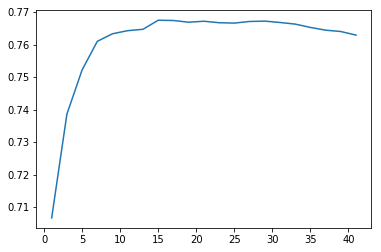

In [42]:
# plot the graph
from matplotlib import pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()

In [43]:
from sklearn.svm import SVC

In [44]:
SVCLinear = SVC(kernel='linear', C = 100000).fit(X,Y)

In [45]:
pred_svm = SVCLinear.predict(df_test)
pred_svm.shape

(10000,)

In [46]:
SVCLinear.score(df_test, test)

0.7783

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf_dt = DecisionTreeClassifier()

In [49]:
clf_dt.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
pred_dt = clf_dt.predict(df_test)
pred_dt.shape

(10000,)

In [51]:
clf_dt.score(df_test, test)

0.6912

In [55]:
from sklearn.neural_network import MLPClassifier

In [105]:
clf_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(400, 7000), random_state=1)

In [106]:
clf_mlp.fit(X,Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 7000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [1]:
pred_mlp = clf_mlp.predict(df_test)

NameError: name 'clf_mlp' is not defined

In [ ]:
clf_mlp.score(df_test, test)